# This notebook plots metrics (including gradients) throughout training (Supplementary Fig. 4)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from six.moves import cPickle
from tensorflow import keras
import helper
from tfomics import utils, explain, metrics
from tensorflow.keras import backend as K

In [81]:
num_trials = 10
model_name = 'cnn-deep'
activations = ['relu', 'exponential']

# save path
results_path = utils.make_directory('../../results', 'gradient_analysis')


# Plot gradients

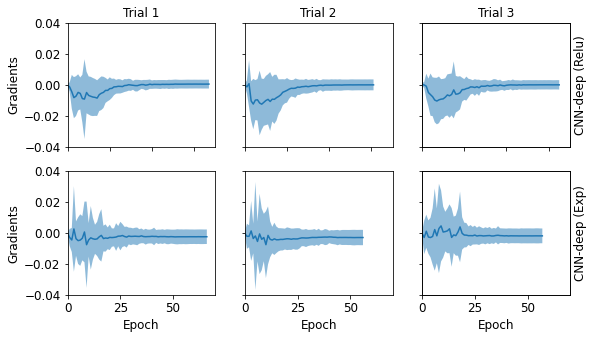

In [87]:

fig = plt.figure(figsize=(9,5))
for trial in range(3):
    activation = 'relu'
    base_name = model_name+'_'+activation + '_' + str(trial)
    file_path = os.path.join(results_path, base_name+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
        grad = cPickle.load(f)

    ax = plt.subplot(2,3,trial+1)
    mean = []
    std = []
    for g in grad:
        mean.append(np.mean(g))
        std.append(np.std(g))
    mean = np.array(mean)
    std = np.array(std)
    x = range(len(mean))
    plt.plot(x, mean)
    plt.fill_between(x, mean-std, mean+std, alpha=0.5)
    plt.xlim([0,70])
    #plt.xticks([0, 25, 50, 75, 100],[0, 25, 50, 75, 100]);
    if trial == 0:
        plt.ylabel('Gradients', fontsize=12)
        plt.yticks([-.04, -.02, 0, 0.02, 0.04], fontsize=12)
        plt.ylim([-0.04,0.04])
    else:
        plt.ylim([-0.04,0.04])
        ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('Trial %d'%(trial+1), fontsize=12)
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Relu)', fontsize=12)


for trial in range(3):
    activation = 'exponential'
    base_name = model_name+'_'+activation + '_' + str(trial)
    file_path = os.path.join(results_path, base_name+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
        grad = cPickle.load(f)

    ax = plt.subplot(2,3,trial+4)
    mean = []
    std = []
    for g in grad:
        mean.append(np.mean(g))
        std.append(np.std(g))
    mean = np.array(mean)
    std = np.array(std)
    x = range(len(mean))
    plt.plot(x, mean)
    plt.fill_between(x, mean-std, mean+std, alpha=0.5)
    plt.xticks([0, 25, 50, 75],[0, 25, 50, 75], fontsize=12);

    plt.xlim([0,70])        
    if trial == 0:
        plt.ylabel('Gradients', fontsize=12)
        plt.yticks([-.04, -.02, 0, 0.02, 0.04], fontsize=12)
        plt.ylim([-0.04,0.04])
    else:
        plt.ylim([-0.04,0.04])
        ax.set_yticklabels([])
    plt.xlabel('Epoch', fontsize=12)
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Exp)', fontsize=12)

outfile = os.path.join(results_path, 'gradients.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


# Plot loss

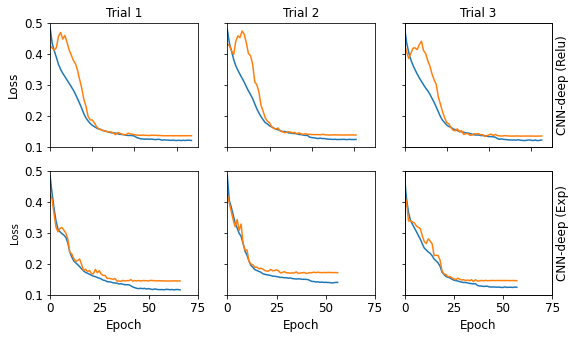

In [88]:

fig = plt.figure(figsize=(9,5))
for trial in range(3):
    activation = 'relu'
    base_name = model_name+'_'+activation + '_' + str(trial)
    file_path = os.path.join(results_path, base_name+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
        grad = cPickle.load(f)

    ax = plt.subplot(2,3,trial+1)
    plt.plot(results[0]);
    plt.plot(results[3]);
    plt.xlim([0,70])
    #plt.xticks([0, 25, 50, 75, 100],[0, 25, 50, 75, 100]);
    if trial == 0:
        plt.ylabel('Loss', fontsize=12)
        plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], fontsize=12)
        plt.ylim([0.1,0.5])
    else:
        plt.ylim([0.1,0.5])
        ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('Trial %d'%(trial+1), fontsize=12)
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Relu)', fontsize=12)


for trial in range(3):
    activation = 'exponential'
    base_name = model_name+'_'+activation + '_' + str(trial)
    file_path = os.path.join(results_path, base_name+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
        grad = cPickle.load(f)

    ax = plt.subplot(2,3,trial+4)
    plt.plot(results[0]);
    plt.plot(results[3]);
    plt.xlim([0,70])
    plt.xticks([0, 25, 50, 75],[0, 25, 50, 75], fontsize=12);
    if trial == 0:
        plt.ylabel('Loss')
        plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], fontsize=12)
        plt.ylim([0.1,0.5])
    else:
        plt.ylim([0.1,0.5])
        ax.set_yticklabels([])
    plt.xlabel('Epoch', fontsize=12)
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Exp)', fontsize=12)
    
outfile = os.path.join(results_path, 'loss.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


# Plot AUPR

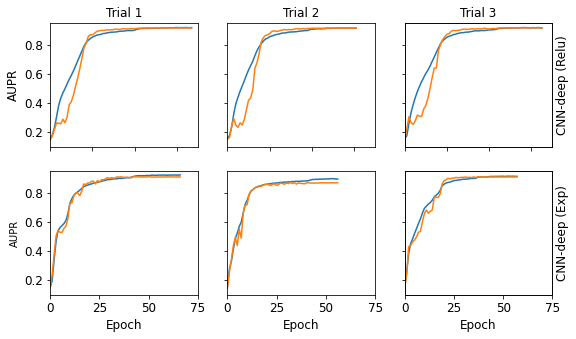

In [89]:

fig = plt.figure(figsize=(9,5))
for trial in range(3):
    activation = 'relu'
    base_name = model_name+'_'+activation + '_' + str(trial)
    file_path = os.path.join(results_path, base_name+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
        grad = cPickle.load(f)

    ax = plt.subplot(2,3,trial+1)
    plt.plot(results[2]);
    plt.plot(results[5]);
    plt.xlim([0,70])
    #plt.xticks([0, 25, 50, 75, 100],[0, 25, 50, 75, 100]);
    if trial == 0:
        plt.ylabel('AUPR', fontsize=12)
        plt.yticks([0.2, 0.4, 0.6, 0.8], fontsize=12)
        plt.ylim([0.1,.95])
    else:
        plt.ylim([0.1,.95])
        ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('Trial %d'%(trial+1), fontsize=12)
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Relu)', fontsize=12)


for trial in range(3):
    activation = 'exponential'
    base_name = model_name+'_'+activation + '_' + str(trial)
    file_path = os.path.join(results_path, base_name+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
        grad = cPickle.load(f)

    ax = plt.subplot(2,3,trial+4)
    plt.plot(results[2]);
    plt.plot(results[5]);
    plt.xlim([0,70])
    plt.xticks([0, 25, 50, 75],[0, 25, 50, 75], fontsize=12);
    if trial == 0:
        plt.ylabel('AUPR')
        plt.yticks([0.2, 0.4, 0.6, 0.8], fontsize=12)
        plt.ylim([0.1,.95])
    else:
        plt.ylim([0.1,.95])
        ax.set_yticklabels([])
    plt.xlabel('Epoch', fontsize=12)
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Exp)', fontsize=12)
    
outfile = os.path.join(results_path, 'aupr.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
